<a href="https://colab.research.google.com/github/aaptecode/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [1]:
##### Your Code Here #####
!pip install --upgrade tensorflow Keras


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (1.13.1)
Requirement already up-to-date: Keras in /usr/local/lib/python3.6/dist-packages (2.2.4)


In [0]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
np.random.seed(237)
style.use('seaborn-whitegrid')

In [2]:
import keras
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import losses
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

Using TensorFlow backend.


57344/57026 [==============================] - 0s 1us/step


((404, 13), (404,), (102, 13), (102,))

In [3]:
type(x_train)

numpy.ndarray

In [0]:
# CRIM: Per capita crime rate by town
# ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
# INDUS: Proportion of non-retail business acres per town
# CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# NOX: Nitric oxide concentration (parts per 10 million)
# RM: Average number of rooms per dwelling
# AGE: Proportion of owner-occupied units built prior to 1940
# DIS: Weighted distances to five Boston employment centers
# RAD: Index of accessibility to radial highways
# TAX: Full-value property tax rate per $10,000
# PTRATIO: Pupil-teacher ratio by town
# B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
# LSTAT: Percentage of lower status of the population
# MEDV: Median value of owner-occupied homes in $1000s

In [5]:
cols = ['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

X_train = pd.DataFrame(x_train, columns=cols, copy=True)
X_test = pd.DataFrame(x_test, columns=cols, copy=True)
Y_train = pd.Series(y_train)
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [6]:
type(X_train.values)

numpy.ndarray

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 41.1 KB


**Scaling**

In [0]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std

**Neural Network Model**

In [9]:
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(16, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal')) # Final Layer

model.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mse'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                1040      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 6,113
Trainable params: 6,113
Non-trainable params: 0
_________________________________________________________________


**Fitting the Model**

In [10]:
history = model.fit(x_train,y_train, epochs=500, validation_split=0.10)
scores = model.evaluate(x_test, y_test)

print(f'\nThe mean squared error from the NN is {model.metrics_names[1]}: {scores[1]}.')

Instructions for updating:
Use tf.cast instead.
Train on 363 samples, validate on 41 samples
Epoch 1/500
363/363 [==============================] - 1s 2ms/step - loss: 598.6150 - mean_squared_error: 598.6150 - val_loss: 504.5493 - val_mean_squared_error: 504.5493
Epoch 2/500
363/363 [==============================] - 0s 56us/step - loss: 590.4271 - mean_squared_error: 590.4271 - val_loss: 496.5862 - val_mean_squared_error: 496.5862
Epoch 3/500
363/363 [==============================] - 0s 51us/step - loss: 581.8715 - mean_squared_error: 581.8715 - val_loss: 488.2251 - val_mean_squared_error: 488.2251
Epoch 4/500
363/363 [==============================] - 0s 59us/step - loss: 573.0252 - mean_squared_error: 573.0252 - val_loss: 479.5065 - val_mean_squared_error: 479.5065
Epoch 5/500
363/363 [==============================] - 0s 58us/step - loss: 563.9062 - mean_squared_error: 563.9062 - val_loss: 471.1141 - val_mean_squared_error: 471.1141
Epoch 6/500
363/363 [===========================

**Plot**

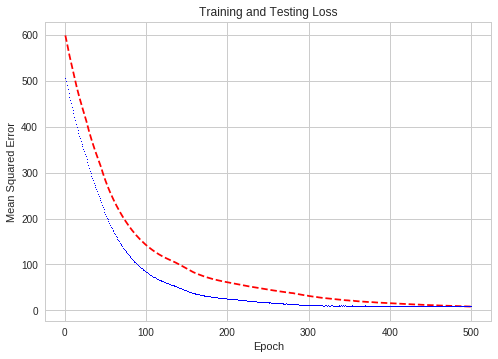

In [11]:
training_loss = history.history['loss']

testing_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, testing_loss, 'b,')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
# plt.legend('best')

plt.show()

**Linear Regression Model**

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

print(f'The mean squared error from linear regression is {mean_squared_error(y_test, y_pred)}.')

The mean squared error from linear regression is 23.195599256422984.


**Feature Engineering**

### Original Features 

CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [13]:
temp = pd.concat([X_train, Y_train], axis='columns')
# temp.columns
temp.rename(columns={0:'MEDV'}, inplace=True)
temp.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


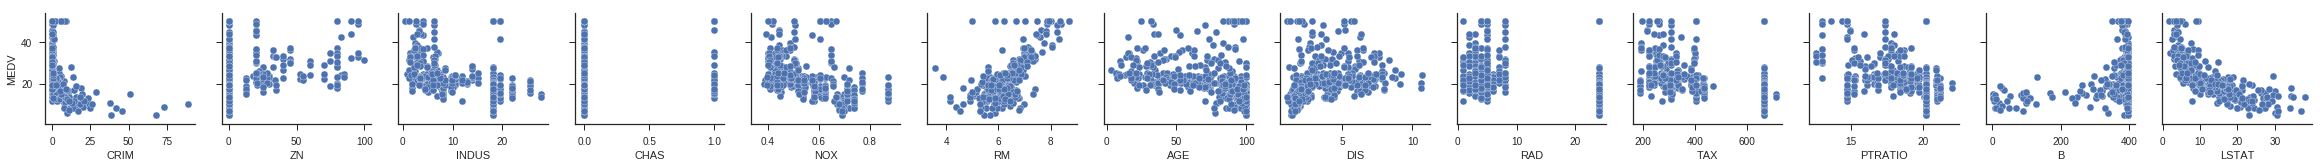

In [14]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)

# Only plot the scatterplot of x variables with our y variable
sns.pairplot(data = temp, y_vars= 'MEDV', x_vars=X_train.columns)

In [0]:
cols = ['CRIM', 'INDUS', 'NOX', 'DIS', 'B', 'LSTAT']

for col in cols:
    new_col = 'log_' + str(col)
    X_train[new_col] = np.log(X_train[col])
    X_test[new_col] = np.log(X_test[col])
#     X_train.fillna(-99.0, inplace=True)
#     X_test.fillna(-99.0, inplace=True)



In [17]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,log_CRIM,log_INDUS,log_NOX,log_DIS,log_B,log_LSTAT
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,0.209020,2.096790,-0.619897,1.380503,5.983684,2.929592
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,-3.827222,0.708036,-0.879477,1.835776,5.979847,1.134623
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,1.588872,2.895912,-0.460449,0.287057,5.928312,1.181727
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,-3.228674,1.646734,-0.663588,1.789306,5.983684,2.080691
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,1.306469,2.895912,-0.338274,0.942777,5.969807,2.684440


In [0]:
x_train2 = X_train.as_matrix()
x_test2 = X_test.as_matrix()

In [0]:
mean = x_train2.mean(axis=0)
x_train2 -= mean
std = x_train2.std(axis=0)
x_train2 /= std

x_test2 -= mean
x_test2 /= std

In [22]:
model = Sequential()
model.add(Dense(64, input_dim=x_train2.shape[1], kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(64, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(16, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal')) # Final Layer


#     model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
#     model.add(layers.Dense(64, activation='relu'))
#     model.add(layers.Dense(1, activation = 'softmax'))

model.compile(loss=losses.mean_squared_error, optimizer='adam', metrics=['mse'])
# model.summary()
history = model.fit(x_train2,y_train, epochs=500, validation_split=0.25)
scores = model.evaluate(x_test2, y_test)

print(f'\nThe mean squared error from the NN is {model.metrics_names[1]}: {scores[1]}.')


Train on 303 samples, validate on 101 samples
Epoch 1/500
303/303 [==============================] - 0s 919us/step - loss: 549.4241 - mean_squared_error: 549.4241 - val_loss: 684.4670 - val_mean_squared_error: 684.4670
Epoch 2/500
303/303 [==============================] - 0s 75us/step - loss: 542.9957 - mean_squared_error: 542.9957 - val_loss: 677.0833 - val_mean_squared_error: 677.0833
Epoch 3/500
303/303 [==============================] - 0s 62us/step - loss: 536.4120 - mean_squared_error: 536.4120 - val_loss: 669.4033 - val_mean_squared_error: 669.4033
Epoch 4/500
303/303 [==============================] - 0s 77us/step - loss: 529.5011 - mean_squared_error: 529.5011 - val_loss: 661.5869 - val_mean_squared_error: 661.5869
Epoch 5/500
303/303 [==============================] - 0s 71us/step - loss: 522.4439 - mean_squared_error: 522.4439 - val_loss: 653.9713 - val_mean_squared_error: 653.9713
Epoch 6/500
303/303 [==============================] - 0s 62us/step - loss: 515.7269 - mean_s

In [23]:
LR = LinearRegression()

LR.fit(x_train2,y_train)
y_pred = LR.predict(x_test2)

print(f'The mean squared error from linear regression is {mean_squared_error(y_test, y_pred)}.')

The mean squared error from linear regression is 19.630718622380495.


**With Feature Engineering, the MSE for the Neural Network increased while it decreased for the linear regression model.**

## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [33]:
from keras.datasets import mnist
# from keras.utils import np_utils

# global hyperparameters

batch_size = 128
num_classes = 10
epochs = 25

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# One Hot Encoding

y_train = keras.utils.to_categorical(y_train, num_classes) # NEW STEP
y_test = keras.utils.to_categorical(y_test, num_classes) # NEW STEP

# Scaling Features for pixel intensity

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [34]:
model = Sequential()
model.add(Dense(16,activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 16)                12560     
_________________________________________________________________
dense_16 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_17 (Dense)             (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [35]:
history = model.fit(x_train,y_train, epochs=epochs, validation_split=0.1)
scores = model.evaluate(x_test, y_test)

print(f'\n{model.metrics_names[1]}: {scores[1]*100}%')


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s 61us/step - loss: 0.4843 - acc: 0.8578 - val_loss: 0.2249 - val_acc: 0.9375
Epoch 2/25
54000/54000 [==============================] - 3s 53us/step - loss: 0.2535 - acc: 0.9259 - val_loss: 0.2035 - val_acc: 0.9430
Epoch 3/25
54000/54000 [==============================] - 3s 52us/step - loss: 0.2210 - acc: 0.9370 - val_loss: 0.1774 - val_acc: 0.9493
Epoch 4/25
54000/54000 [==============================] - 3s 54us/step - loss: 0.2005 - acc: 0.9420 - val_loss: 0.1610 - val_acc: 0.9547
Epoch 5/25
54000/54000 [==============================] - 3s 53us/step - loss: 0.1843 - acc: 0.9479 - val_loss: 0.1545 - val_acc: 0.9563
Epoch 6/25
54000/54000 [==============================] - 3s 53us/step - loss: 0.1738 - acc: 0.9506 - val_loss: 0.1513 - val_acc: 0.9603
Epoch 7/25
54000/54000 [==============================] - 3s 53us/step - loss: 0.1644 - acc: 0.9515 - val_loss: 0.1480 - val_acc:

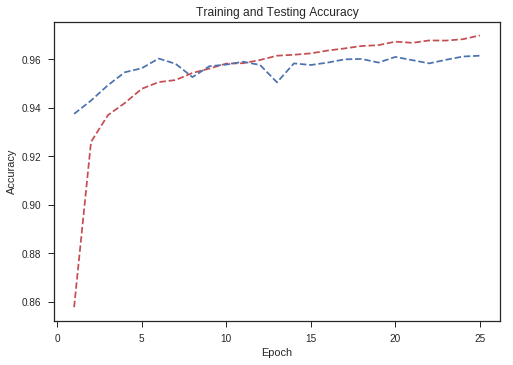

In [37]:
training_acc = history.history['acc']

testing_acc = history.history['val_acc']

epoch_count = range(1, len(training_acc) + 1)

plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, testing_acc, 'b--')
plt.title('Training and Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.legend('best')

plt.show()

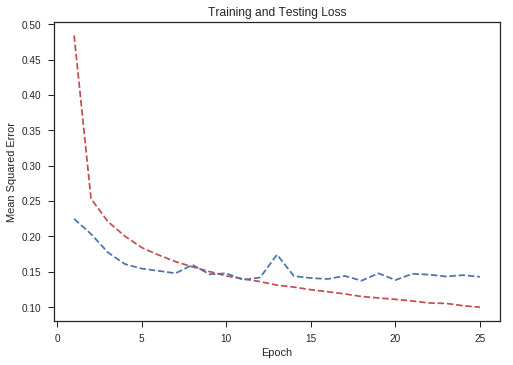

In [38]:
training_loss = history.history['loss']

testing_loss = history.history['val_loss']

epoch_count = range(1, len(training_loss) + 1)

plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, testing_loss, 'b--')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
# plt.legend('best')

plt.show()

## Extra Stuff

In [0]:
!pip install hyperas
!pip install hyperopt

In [0]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
np.random.seed(237)
style.use('seaborn-whitegrid')

In [0]:
from __future__ import print_function
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.datasets import mnist
from keras.utils import np_utils

In [0]:
##### Your Code Here #####

def data():
    '''
    Data providing function:
    This function is separated from model() so that hyperopt
    won't reload data for each evaluation run.
    '''
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000, 784)
    X_test = X_test.reshape(10000, 784)
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    nb_classes = 10
    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)
    return X_train, Y_train, X_test, Y_test

In [0]:
def model(X_train, Y_train, X_test, Y_test):
    '''
    Model providing function:
    Create Keras model with double curly brackets dropped-in as needed.
    Return value has to be a valid python dictionary with two customary keys:
        - loss: Specify a numeric evaluation metric to be minimized
        - status: Just use STATUS_OK and see hyperopt documentation if not feasible
    The last one is optional, though recommended, namely:
        - model: specify the model just created so that we can later use it again.
    '''
    model = Sequential()
    model.add(Dense(512, input_shape=(784,)))
    model.add(Activation('relu'))
    model.add(Dropout({{uniform(0, 1)}}))
    model.add(Dense({{choice([256, 512, 1024])}}))
    model.add(Activation({{choice(['relu', 'sigmoid'])}}))
    model.add(Dropout({{uniform(0, 1)}}))

    # If we choose 'four', add an additional fourth layer
    if {{choice(['three', 'four'])}} == 'four':
        model.add(Dense(100))
        model.add({{choice([Dropout(0.5), Activation('linear')])}})
        model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer={{choice(['rmsprop', 'adam', 'sgd'])}},
                  metrics=['accuracy'])

    model.fit(X_train, Y_train,
              batch_size={{choice([64, 128])}},
              nb_epoch=1,
              verbose=2,
              validation_data=(X_test, Y_test))
    score, acc = model.evaluate(X_test, Y_test, verbose=0)
    print('Test accuracy:', acc)
    return {'loss': -acc, 'status': STATUS_OK, 'model': model}

In [0]:
# See: https://stackoverflow.com/questions/49920031/get-the-path-of-the-notebook-on-google-colab
# Install the PyDrive wrapper & import libraries.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)



In [0]:
# Copy/download the file
fid = drive.ListFile({'q':"title='HyperasOnColabExample.ipynb'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('HyperasOnColabExample.ipynb')

IndexError: ignored

In [0]:
best_run, best_model = optim.minimize(model=model,
                                          data=data,
                                          max_evals=10,
                                          algo=tpe.suggest,
                                          notebook_name='HyperasOnColabExample', # This is important!
                                          trials=Trials())

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use RandomSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.